# Project Data Analisis dengan Python

*Nama : Fernando Michael Hebert Siregar*<br>
*Bangkit Machine Learning 2024*<br>
*ML-67*
<br>
<br>
Pada kesempatana kali ini saya ditugaskan untuk membuat sebuah project dari Dicoding dan saya memilih 1 dari 3 Dataset yang disediakan. Disini saya akan menggunakan Dataset Bike-Sharing, dimana dataset ini merupakan sebuah dataset tentang list penyewaan sepeda dalam satuan hari di file day.csv dan hour.csv dalam satuan jam.<br>
Penjelasan mengenai colomn dalam dataset ini : 
1. instant: record index
2. dteday : tanggal
3. yr : tahun ( 0 : 2011, 1 : 2012)
4. mnth : bulan ( 1 sampai 12)
5. holiday : hari libur (0 menyatakan tidak libur, 1 menyatakan libur)
6. weekday : hari dalam seminggu
7. working day : hari kerja (1 : hari kerja, 0 : weekend / libur)
8. weather : 
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
9. temp : temperatur atau suhu dalam celcius. nilai dinormalisasi dibagi 41
10. atemp : suhu yang dirasakan, nilai dinormalisasi dibagi 50
11. hum : normalisasi humidity
12. windspeed : kecepatan angin yang telah dinormalisasi dibagi 67
13. casual : pengguna biasa
14. registered : pengguna yang terdaftar
15. cnt : total dari semua yang menyewa sepeda
<br>
<br>
Pertanyaan yang ingin dijawab dalam Analsis data kali ini adalah : <br>
* Apakah cuaca mempengaruhi kuantitas penyewaan sepeda? Jika iya pada musim apakah sepeda banyak digunakan dan pada cuaca apakah sepeda jarang digunakan ?
* Berapa banyak kuantitas penyewaan sepeda setiap bulannya ? Adakah bulan tertentu dan ketergantungannya dengan suatu musim dalam banyaknya penyewaan sepeda ?
* Bagaimana penggunaan sepeda dalam hari kerja? apakah pengguna sepeda hari kerja dan libur terdapat perbedaan yang signifikan?
* Adakah korelasi / hubungan kuat antara banyaknya permintaan penyewaan sepeda dengan suhu pada tahun 2011?


### 1. Mengimport Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

### 2. Data Wrangling

### 2.1 Gathering Data

In [2]:
day_data_df = pd.read_csv('data/day.csv')
day_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_data_df = pd.read_csv('data/hour.csv')
hour_data_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2.2 Assessing Data

In [4]:
hour_data_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [5]:
day_data_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [6]:
day_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari info yang terlihat diatas data dapat dilihat bahwa data lengkap dan data masih Acurate dapat dilihat dalam function describe

In [8]:
print("Data Duplikat pada dataframe day \t: ", day_data_df.duplicated().sum())
print("Data Duplikat pada dataframe hour \t: ", hour_data_df.duplicated().sum())

Data Duplikat pada dataframe day 	:  0
Data Duplikat pada dataframe hour 	:  0


Tidak ada data duplikat pada kedua dataset diatas

In [9]:
day_data_df['dteday'] = pd.to_datetime(day_data_df['dteday'])
day_data_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "workingday" : "workday",
    "weathersit" : "weather",
}, inplace=True)
day_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workday     731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
hour_data_df['dteday'] = pd.to_datetime(hour_data_df['dteday'])
hour_data_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr" : "hour",
    "workingday" : "workday",
    "weathersit" : "weather",
}, inplace=True)
hour_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workday     17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [11]:
season_map = {
    1 : "spring",
    2 : "summer",
    3 : "fall",
    4 : "winter"
}
weather_map = {
    1 : "clear",
    2 : "mist",
    3 : "light rain",
    4 : "heavy rain"
}

# Mengubah data numeric season dan weather pada dataset
day_data_df['season'] = day_data_df['season'].map(season_map)
day_data_df['weather'] = day_data_df['weather'].map(weather_map)

hour_data_df['season'] = hour_data_df['season'].map(season_map)
hour_data_df['weather'] = hour_data_df['weather'].map(weather_map)

In [12]:
day_data_df.head()

,instant,date,season,year,month,holiday,weekday,workday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_data_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


## 3. EDA (Exploratory Data Analysis)

In [14]:
day_data_df.groupby(by="season").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt            
               mean   min   max
season                         
fall    5644.303191  1115  8714
spring  2604.132597   431  7836
summer  4992.331522   795  8362
winter  4728.162921    22  8555

Dari hasil diatas dapat dilihat bahwa rata - rata orang setiap harinya akan menggunakan sepeda pada musim Fall atau gugur sedangkan paling sedikit pada musim Spring atau semi.

In [15]:
day_data_df.groupby(by="weather").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt           
                   mean  min   max
weather                           
clear       4876.786177  431  8714
light rain  1803.285714   22  4639
mist        4035.862348  605  8362

Dari data datas dapat dilihat bahwa rata - rata orang akan menggunakan sepedanya saat cuaca sedang cerah

In [16]:
hour_data_df.groupby(by="hour").agg({
    "cnt" : ["min", "mean", "max"]
})

cnt                 
     min        mean  max
hour                     
0      2   53.898072  283
1      1   33.375691  168
2      1   22.869930  132
3      1   11.727403   79
4      1    6.352941   28
5      1   19.889819   66
6      1   76.044138  213
7      1  212.064649  596
8      5  359.011004  839
9     14  219.309491  426
10     8  173.668501  539
11    10  208.143054  663
12     3  253.315934  776
13    11  253.661180  760
14    12  240.949246  750
15     7  251.233196  750
16    11  311.983562  783
17    15  461.452055  976
18    23  425.510989  977
19    11  311.523352  743
20    11  226.030220  567
21     6  172.314560  584
22     9  131.335165  502
23     2   87.831044  256

Tingginya rata - rata penyewaan sepeda pada jam - jam tertenu di kisaran pukul 07.00 Pagi hingga pada pukul 20.00 Malam

In [17]:
day_data_df.groupby(by="weekday").cnt.mean().reset_index()

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,4,4667.259615
5,5,4690.288462
6,6,4550.542857


In [18]:
day_data_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Terdapat peningkatan pada penyewaan sepeda pada hari kerja yang cukup jauh

In [19]:
day_data_df.groupby(by="month").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt            
              mean   min   max
month                         
1      2176.338710   431  4521
2      2655.298246  1005  5062
3      3692.258065   605  8362
4      4484.900000   795  7460
5      5349.774194  2633  8294
6      5772.366667  3767  8120
7      5563.677419  3285  8173
8      5664.419355  1115  7865
9      5766.516667  1842  8714
10     5199.225806    22  8156
11     4247.183333  1495  6852
12     3403.806452   441  6606

Sesuai dengan analisis sebelumnya bahwa disini jika dilihat berdasarkan bulan rata - rata tertinggi masih dipegang pada bulan Juni dan September yang dimana pada bulan tersebut masing - masing merupakan musim panas dan musim gugur

In [20]:
day_data_df.groupby(by="year").agg({
    "cnt" : ["min", "mean", "max"],
    "temp" : ["min", "mean", "max"]
})

cnt                        temp                    
      min         mean   max      min      mean       max
year                                                     
0     431  3405.761644  6043  0.05913  0.486665  0.849167
1      22  5599.934426  8714  0.10750  0.504081  0.861667

Dari data pivot diatas terlihat bahwa pada tahun 2011 (0) dan tahun 2012 (1), memiliki korelasi yang baik, dan terlihat pula bahwa pada tahun 2011 nilai terendah penyewaan sepeda lebih tinggi dari pada tahun 2012, namun disini sebaliknya untuk nilai tertinggi pada tahun 2011 hanya mencapai 6043 dan pada tahun jauh lebih tinggi di angka 8714

## Explanatory Data Anlysis dan Data Visualization

### Pertanyaan 1
#### Apakah cuaca mempengaruhi kuantitas penyewaan sepeda? Jika iya pada musim apakah sepeda banyak digunakan dan pada cuaca apakah sepeda jarang digunakan ?

Text(0.5, 1.0, 'Penyewaan sepeda berdasarkan cuaca  data dalam jam')

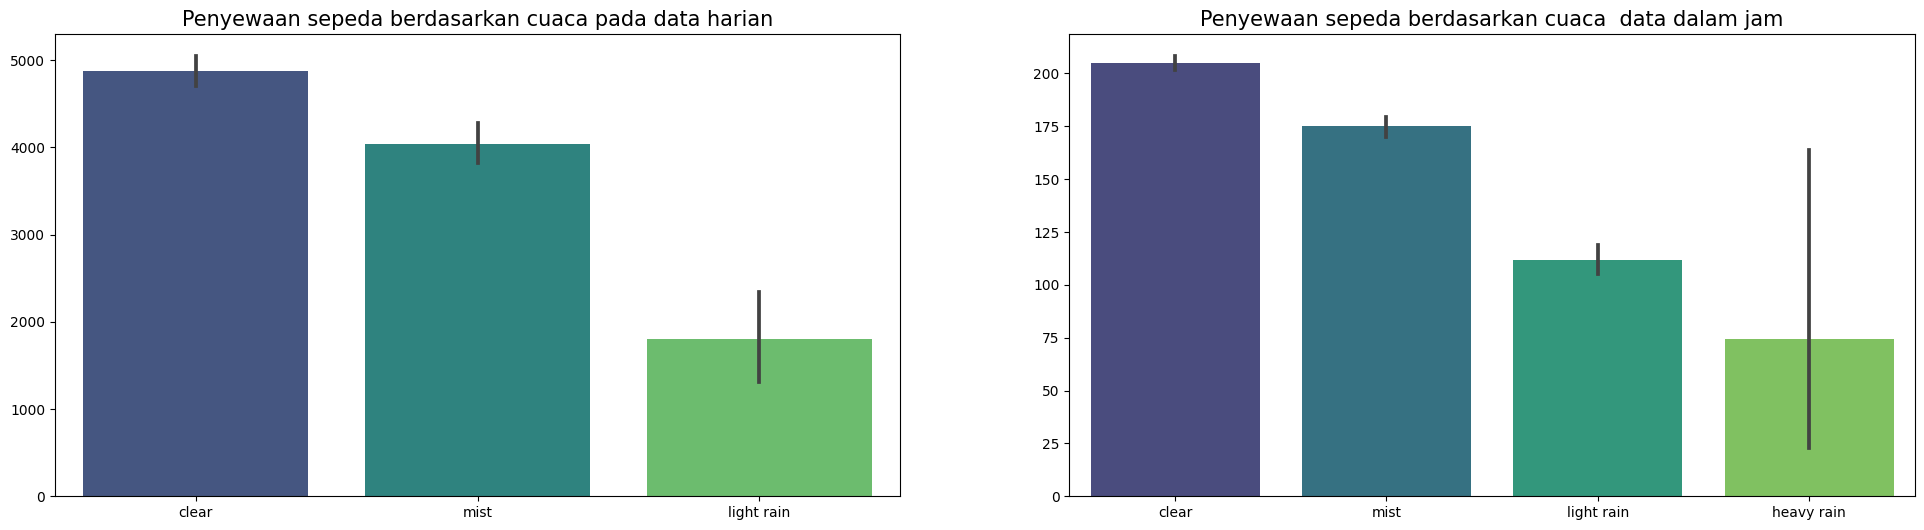

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="weather", y="cnt", data=day_data_df.sort_values(by="cnt", ascending=False), palette="viridis", ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Penyewaan sepeda berdasarkan cuaca pada data harian", loc="center", fontsize=15)

sns.barplot(x="weather", y="cnt", data=hour_data_df.sort_values(by="cnt", ascending=False), palette="viridis", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Penyewaan sepeda berdasarkan cuaca  data dalam jam", loc="center", fontsize=15)

Answer : <br>
Dapat dilihat berdasarkan grafik bar diatas, bahwa kebanyakan orang - orang akan membawa sepeda pada saat cuaca cerah dan diikuti dengan cuaca berkabut dan seterusnya, hal ini dapat disimpulkan bahwa orang cenderung menggunakan sepeda saat cuaca sedang baik dan suhu yang normal dan orang jarang atau tidak sama sekali menggunakan sepeda saat cuaca buruk. Dan seperti yang kita tahu sebelumnya bahwa selain ketiga cuaca diatas terdapat cuaca ke 4 yaitu "hujan deras" namun tidak ditampilkan pada subplots sebelah kiri karena tidak ada orang yang menyewa sepeda pada saat cuaca buruk tersebut. Namun jika ingin melihat lebih detail disini kita bisa lihat dalam dataset dalam tampilan jam, dimana terdapat orang yang menyewa sepeda pada saat cuaca sedang buruk.

### Pertanyaan 2
#### Berapa banyak kuantitas penyewaan sepeda setiap bulannya ? Adakah bulan tertentu dan ketergantungannya dengan suatu musim dalam banyaknya penyewaan sepeda ?

<Axes: xlabel='month', ylabel='cnt'>

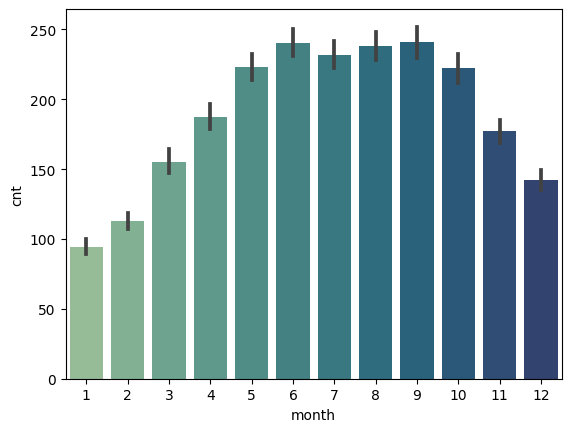

In [22]:
sns.barplot(x="month", y="cnt", data=hour_data_df.sort_values(by=["cnt", "month"], ascending=False), palette="crest")

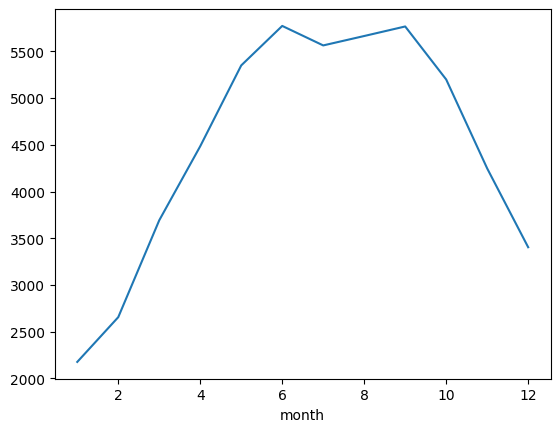

In [23]:
byMonth = day_data_df.groupby('month').cnt.mean().plot()

Answer : <br>
Dari grafik garis dan bar diatas mendukung analisis sebelumnya dimana peningkatan permintaan penyewaan sepeda terjadi pada bulan 6 (Juni) dan 9 (September) yang cukup tinggi hal ini dikarenakan bulan tersebut masing - masing termasuk musim Summer (panas) dan Fall (gugur). Kemungkinan orang - orang menggunakan sepeda pada suhu hangat

### Pertanyaan 3
#### Bagaimana kuantitas penyewaan sepeda dalam hari kerja? apakah pengguna sepeda hari kerja dan libur terdapat perbedaan yang signifikan?

Text(0.5, 1.0, 'Penyewaan sepeda pada hari libur')

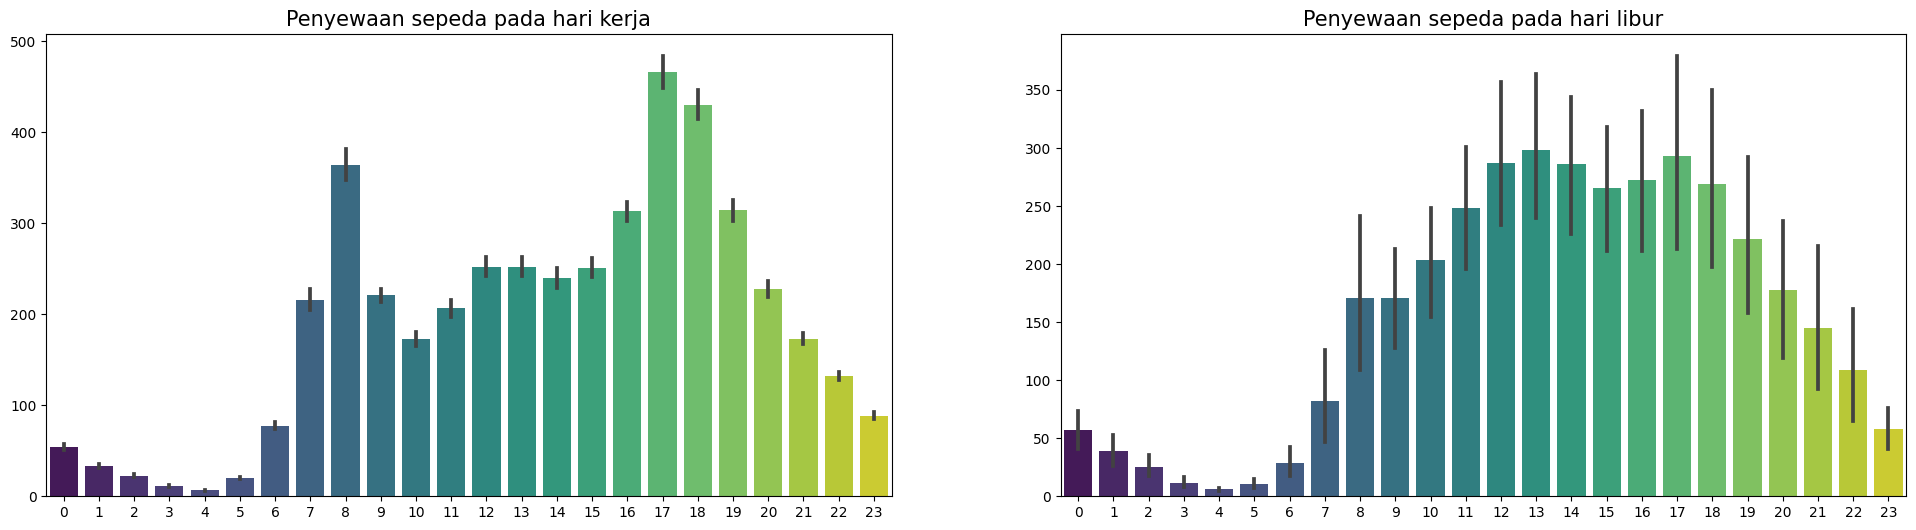

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="hour", y="cnt", data=hour_data_df[hour_data_df['holiday']==0], palette="viridis", ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Penyewaan sepeda pada hari kerja", loc="center", fontsize=15)

sns.barplot(x="hour", y="cnt", data=hour_data_df[hour_data_df['holiday']==1], palette="viridis", ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Penyewaan sepeda pada hari libur", loc="center", fontsize=15)

Answer : <br>
Dari grafik diatas terlihat penyebaran kuantitas penyewaan sepeda pada hari kerja dimana : 
* Pada jam 8 dan jam 18 merupakan permintaan tertinggi dikarenakan biasanya pada jam tersebut banyak orang mengawali jam kerja pada jam 8 dan orang juga banyak memilih sepeda sebagai moda transportasi yang mereka gunakan, hal ini juga terjadi pada jam 18 dan 19 dimana orang akan kembali ke rumah masing - masing setelah melakukan pekerjaan dan juga anak sekolah yang baru pulang dari kesibukan mereka masing - masing.
* Suhu jam 7 dan 8 pagi serta pada jam 16, 17, 18, dan 19 sore juga mempengaruhi kuantitas penyewaan sepeda dimana hal ini dapat dibuktikan dengan rendahnya penggunaan sepeda pada jam - jam yang memiliki suhu panas seperti pada jam 10 hingga jam 15, dan orang juga menghindari mengendarai sepeda pada suhu dingin seperti pada jam 23 - 4.

Namun pada hari libur sebaliknya dapat dilihat bahwa : 
* Penyebaran jam penggunaan sepeda pada hari libur tidak bergantung pada jam kerja dimana orang lebih banyak menghabiskan waktu pada hari libur hanya untuk sekedar rekreasi dan berolahraga dimana dapat dilihat bahwa peningkatan pada hari libur dimulai dari jam 11 hingga jam 19 hal ini dapat disimpulkan bahwa pada hari libur orang - orang cenderung menggunakan transportasi sepeda untuk rekreasi dan lainnya.
* Dapat dilihat pada bagian kiri grafik atau sumbu Y pada grafik hari libur bahwa penggunaan sepeda pada hari libur kuantitasnya dibawah 350 penyewaan hal ini dapat disimpulkan bahwa orang kurang meminati menggunakan sepeda pada hari libur.

Text(0.5, 1.0, 'Permintaan penyewaan sepeda dalam satu minggu')

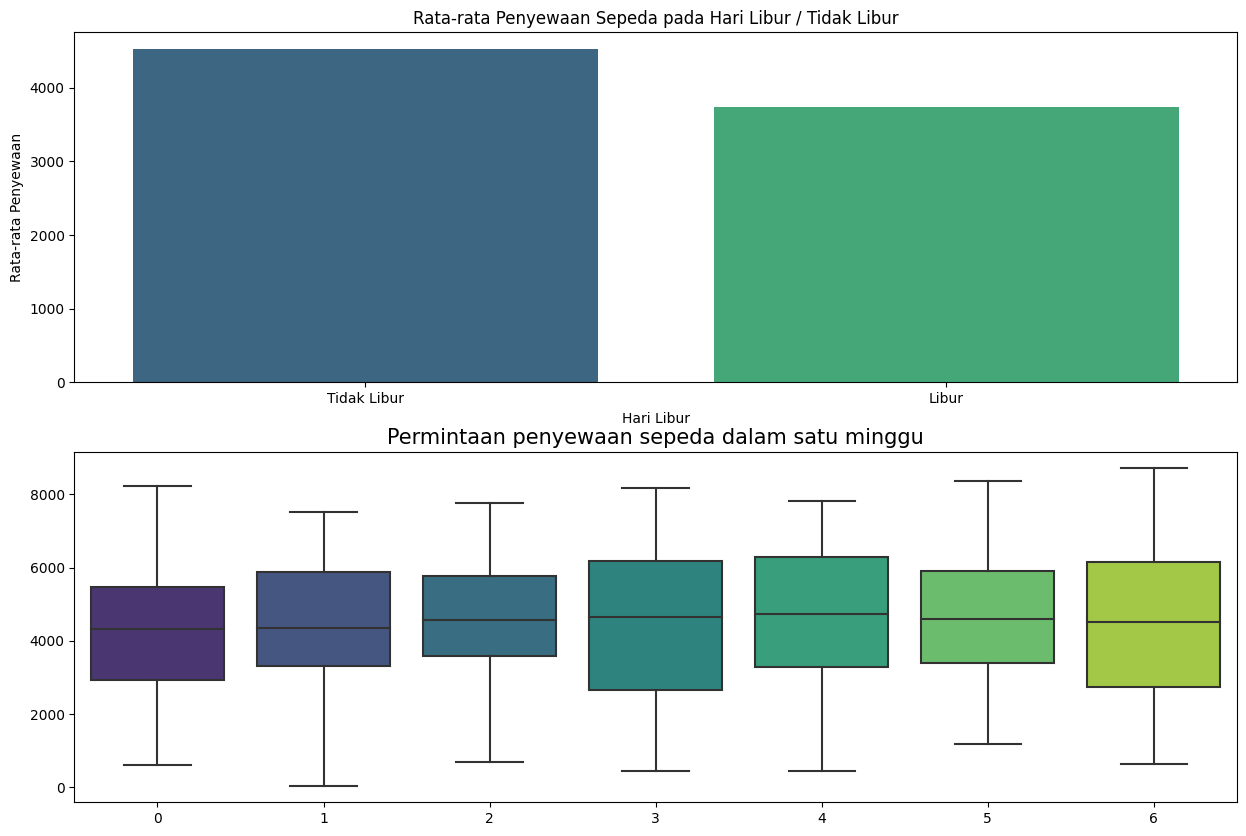

In [25]:
avg_holiday = day_data_df.groupby('holiday')['cnt'].mean().reset_index().sort_values("cnt")
fig, ax = plt.subplots(2, 1, figsize=(15,10))

sns.barplot(x='holiday', y='cnt', data=avg_holiday, palette="viridis", ax=ax[0])
ax[0].set_title('Rata-rata Penyewaan Sepeda pada Hari Libur / Tidak Libur')
ax[0].set_xlabel('Hari Libur')
ax[0].set_ylabel('Rata-rata Penyewaan')
ax[0].set_xticks([0, 1], ['Tidak Libur', 'Libur'])

sns.boxplot(x="weekday", y="cnt", data=day_data_df, palette="viridis", ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Permintaan penyewaan sepeda dalam satu minggu", loc="center", fontsize=15)

Answer : <br>
Dari grafik diatas dapat mendukung pernyataan sebelumnya dimana orang lebih banyak menggunakan sepeda pada hari kerja / tidak libur, dan penyebarannya terlihat dalam grafik boxplot penyewaan sepeda dalam 1 minggu, untuk nilai terbesar terjadi pada hari - hari kerja yaitu senin - sabtu.

## Pertanyaan 4
### Adakah korelasi / hubungan kuat antara banyaknya permintaan penyewaan sepeda dengan suhu pada tahun 2011?

In [26]:
data_2011 = day_data_df[day_data_df['year'] == 0]
data_2011.corr(numeric_only=True)

,instant,year,month,holiday,weekday,workday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,NaN,0.996504,0.033929,0.011811,-0.004646,0.289165,0.301958,0.244867,-0.240111,0.166029,0.484911,0.439829
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.996504,NaN,1.000000,0.032808,0.012860,-0.004288,0.288663,0.301920,0.242533,-0.242443,0.169797,0.489148,0.444607
holiday,0.033929,NaN,0.032808,1.000000,-0.076087,-0.247461,-0.019272,-0.026448,-0.030896,0.000734,0.089853,-0.111128,-0.049193
weekday,0.011811,NaN,0.012860,-0.076087,1.000000,0.020445,-0.039292,-0.042810,-0.065932,0.061525,-0.019604,0.004569,-0.004396
workday,-0.004646,NaN,-0.004288,-0.247461,0.020445,1.000000,0.046799,0.046158,0.034250,0.011955,-0.541419,0.310969,0.020661
temp,0.289165,NaN,0.288663,-0.019272,-0.039292,0.046799,1.000000,0.996458,0.145776,-0.114200,0.581038,0.698136,0.771214
atemp,0.301958,NaN,0.301920,-0.026448,-0.042810,0.046158,0.996458,1.000000,0.155812,-0.136544,0.581153,0.703381,0.775294
hum,0.244867,NaN,0.242533,-0.030896,-0.065932,0.034250,0.145776,0.155812,1.000000,-0.215718,-0.032290,0.019412,0.001898
windspeed,-0.240111,NaN,-0.242443,0.000734,0.061525,0.011955,-0.114200,-0.136544,-0.215718,1.000000,-0.190517,-0.261590,-0.278000


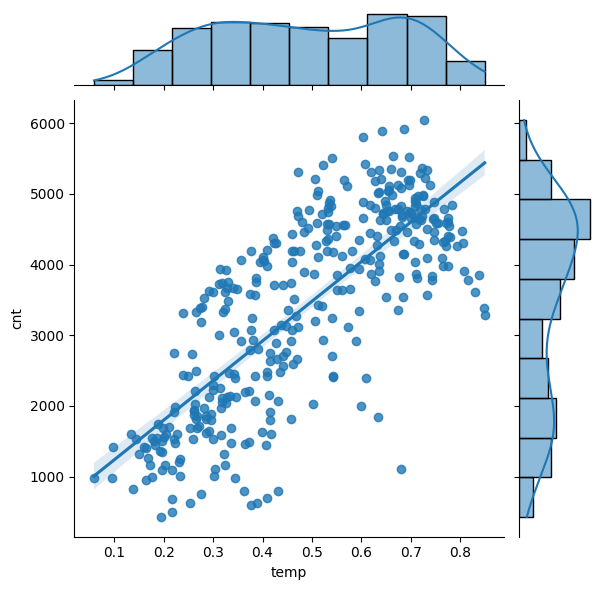

In [27]:
sns.jointplot(x='temp',y='cnt',data= data_2011,kind='reg')

Answer : <br>
Terdapat korelasi yang cukup baik antara temperatur dan permintaan penyewaan pada sepeda pada tahun 2011, dimana semakin tinggi suhu maka semakin tinggi juga penyewaan sepeda, hal ini dapat terlihat dari grafik jointplot diatas, dan dari tabel korelasi yang telah diberikan terlihat nilai yang hampir mendekati 1 (korelasi sempurna) yaitu dengan nilai 0.771214. Sehingga dapat disimpulkan bahwa kebanyakan orang pada tahun 2011 menggunakan sepeda pada suhu yang hangat atau panas daripada suhu yang dingin.